In [34]:
# -*- coding: utf-8 -*-
# Initial setup

%precision 3
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


path = 'machine-learning-ex2/ex2/'

## 1. Logistic Regression
### 1.1 Examine Data

In [35]:
# Prepare data
exams = ([map(float, line.strip().split(',')) 
         for line in open(path + 'ex2data1.txt')])
exams = np.array(exams)
X, y = exams[:, [0, 1]], exams[:, [2]]

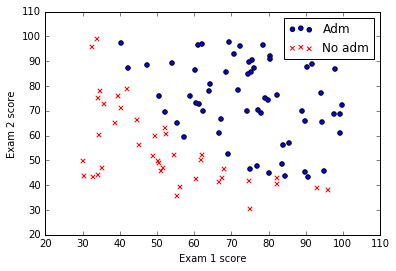

In [36]:
# Plot data
pos, neg = y == 1, y == 0
plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1])
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1], c='red', marker='x')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Adm', 'No adm'])
plt.show()

In [37]:
# Add x0=1
X = np.hstack([np.ones([len(X), 1]), X])

# Set initial theta to 0
theta = np.zeros([X.shape[-1]])

### 1.2 Sigmoid Function

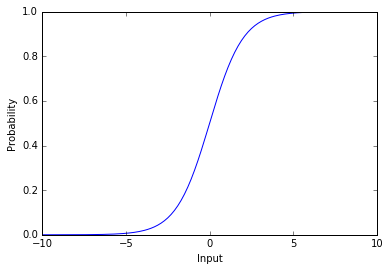

In [38]:
# Define sigmoid function
def sigmoid(z):
    return (1 + np.exp(-z))**-1

# Prepare continuous mock-up input
nums = np.arange(-10, 10, 0.1)

# Draw sigmoid function
plt.plot(nums, sigmoid(nums))
plt.xlabel('Input')
plt.ylabel('Probability')
plt.show()

### 1.3 Cost Function and Gradient

In [39]:
# Define cost function
def cost(theta, X, y):
    m, n = X.shape
    theta = theta.reshape([1, n])
    pos = y * np.log(sigmoid(X.dot(theta.T)))
    neg = (1 - y)*np.log(1 - sigmoid(X.dot(theta.T)))
    J = -sum(pos + neg)/m
    return J

cost(theta, X, y)

array([ 0.69314718])

In [40]:
# Define gradient
def gradient(theta, X, y):
    m, n = X.shape
    theta = theta.reshape([1, n])
    grad = sum((sigmoid(X.dot(theta.T)) - y)*X)/m
    return grad

gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

### 1.4 Learning Parameters

In [41]:
# Use scipy.optimize for parameter learning
import scipy.optimize as opt


opt_result = opt.minimize(fun=cost, 
                          x0=theta,
                          args=(X, y), 
                          method='TNC', 
                          jac=gradient)
print opt_result

  status: 0
 success: True
    nfev: 36
     fun: array([ 0.2034977])
       x: array([-25.16131869,   0.20623159,   0.20147149])
 message: 'Local minimum reached (|pg| ~= 0)'
     jac: array([  8.75697940e-09,   6.43645929e-08,   4.71900562e-07])
     nit: 17


### 1.5 Evaluating Logistic Regression

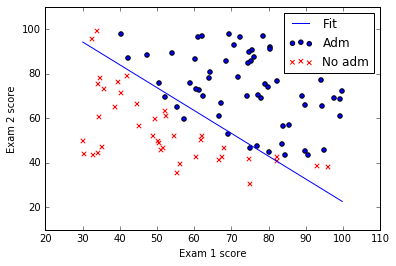

In [42]:
# Plot decision boundary
plt.scatter(X[pos[:, 0], 1], X[pos[:, 0], 2])
plt.scatter(X[neg[:, 0], 1], X[neg[:, 0], 2], c='red', marker='x')

x1 = np.array([np.max(X[:, 1]), np.min(X[:, 1])])
x2 = -(opt_result.x[0] + opt_result.x[1] * x1)/opt_result.x[2]
plt.plot(x1, x2)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Fit', 'Adm', 'No adm'])
plt.show()

In [43]:
# Define predict
def predict(theta, X):
    n = X.shape[-1]
    theta = theta.reshape([1, n])
    return sigmoid(X.dot(theta.T))

p = predict(opt_result.x, X) > 0.5
acc = np.mean(p == y)*100
print 'Train accuracy: {}%'.format(acc)

Train accuracy: 89.0%


## 2. Regularized logistic regression

### 2.1 Examine Data

In [44]:
# Prepare data
chips = ([map(float, line.strip().split(',')) 
         for line in open(path + 'ex2data2.txt')])
chips = np.array(chips)
X, y = chips[:, [0, 1]], chips[:, [2]]

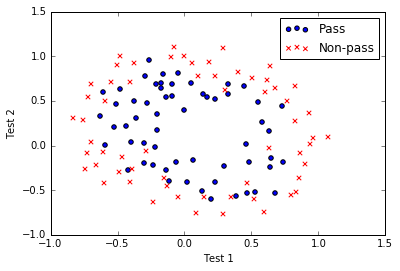

In [45]:
# Plot data
pos, neg = y == 1, y == 0
plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1])
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1], c='r', marker='x')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Pass', 'Non-pass'])
plt.show()

### 2.2 Feature Mapping

In [61]:
# Define feature mapping
def map_feature(X1, X2, pow):
    # X1 and X2 must be the equal length
    m = X1.shape[0]
    X = np.ones([m, 1])
    for i in range(1, pow + 1):
        for j in range(i + 1):
            X = np.hstack([X, ((X1**(i - j))*(X2**j)).reshape([m, 1])])
    return X

# Map features
mapped_X = map_feature(X[:, 0], X[:, 1], 6)

# Set initial theta to 0
theta = np.zeros(mapped_X.shape[-1])

### 2.3 Cost Function and Gradient with Regularization

In [50]:
# Define cost function with regularization
def reg_cost(theta, X, y, L):
    m, n = X.shape    
    theta = theta.reshape([1, n])
    pos = y*np.log(sigmoid(X.dot(theta.T)))
    neg = (1 - y)*np.log(1 - sigmoid(X.dot(theta.T)))
    reg = L*np.sum(theta[-1, 1:]**2)/(2*m)
    J = -sum(pos + neg)/m + reg
    return J

reg_cost(theta, mapped_X, y, L=1)

array([ 0.69314718])

In [51]:
# Define gradient with regularization
def reg_gradient(theta, X, y, L):
    m, n = X.shape
    theta = theta.reshape([1, n])
    reg = (L*np.hstack([np.zeros(1), theta[-1, 1:]]))/m
    grad = sum((sigmoid(X.dot(theta.T)) - y)*X)/m + reg
    return grad

reg_gradient(theta, mapped_X, y, L=1)

array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
         1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
         2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
         1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
         1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
         5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
         3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
         4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
         3.87936363e-02])

### 2.4 Learning Parameters

In [74]:
# Set lambda
L = 1

# Optimize
reg_opt_result = opt.minimize(fun=reg_cost, 
                          x0=theta, 
                          args=(mapped_X, y, L), 
                          method='TNC', 
                          jac=reg_gradient)
reg_opt_result

  status: 1
 success: True
    nfev: 32
     fun: array([ 0.52900273])
       x: array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743189,
       -1.4316693 ,  0.12393227, -0.36553118, -0.35725404, -0.17516292,
       -1.45817008, -0.05098418, -0.61558558, -0.27469165, -1.19271298,
       -0.24217841, -0.20603303, -0.04466178, -0.27778948, -0.29539513,
       -0.45645982, -1.04319154,  0.02779373, -0.29244866,  0.01555759,
       -0.32742404, -0.1438915 , -0.92467487])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
     jac: array([ -2.15093201e-06,   6.79392069e-07,  -3.49183956e-07,
         8.75944959e-07,  -4.08340560e-08,  -9.33842535e-07,
        -5.14475346e-07,   1.70177031e-08,   1.54193505e-08,
        -9.72760589e-07,   6.97281000e-08,   3.55221928e-08,
        -2.79921339e-07,   1.79677695e-07,   2.33170814e-07,
         1.47200136e-07,  -2.12229709e-07,   6.16745858e-07,
        -9.26205998e-08,  -5.27498513e-08,  -1.48168991e-06,
         2.31358069e-07,   1.803

### 2.5 Plotting Decision Boundary

In [75]:
# # Compute cost matrix Z for contour plot
theta0 = np.linspace(-1, 1.5, 50)
theta1 = np.linspace(-1, 1.5, 50)
Z = np.zeros([len(theta0), len(theta1)])

for i in range(len(theta0)):
    for j in range(len(theta1)):
        Z[i, j] = (map_feature(np.array([theta0[i]]), np.array([theta1[j]]), 6)
                   .dot(reg_opt_result.x))

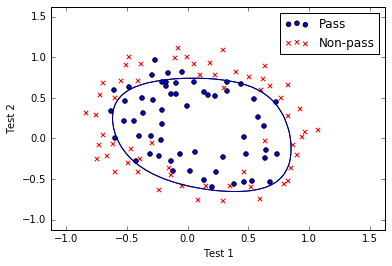

In [76]:
# Plot data
plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1])
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1], c='r', marker='x')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Pass', 'Non-pass'])

# Draw contour line
plt.contour(theta0, theta1, Z, levels=[0, 0])
plt.show()

In [82]:
p = predict(reg_opt_result.x, mapped_X) > 0.5
acc = np.mean(p == y)*100
print 'Train accuracy: {}%'.format(acc)

Train accuracy: 83.0508474576%
